<a href="https://colab.research.google.com/github/kehshiba/gan/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [2]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [3]:
ds = tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete6A3MBM/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete6A3MBM/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
import numpy as np

In [5]:
dataiter = ds.as_numpy_iterator()

In [6]:
np.squeeze(dataiter.next()['image']).shape

(28, 28)

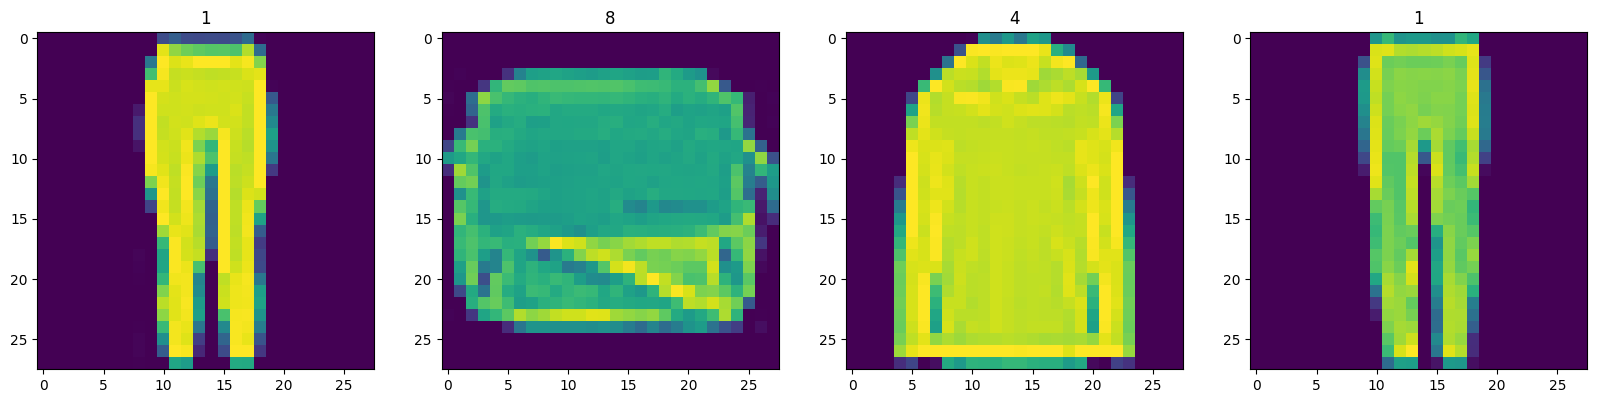

In [7]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
  batch = dataiter.next()
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text(batch['label'])

In [8]:
def scale_img(data):
  image = data['image']
  return image/255

In [9]:
ds = tfds.load('fashion_mnist',split='train')
ds = ds.map(scale_img)
ds = ds.cache()
ds = ds.shuffle(60000)
ds= ds.batch(128)
ds=ds.prefetch(64)


In [10]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D

In [12]:
def build_gen():
  model=Sequential()

  model.add(Dense(7*7*128,input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(1,4,padding='same',activation='sigmoid'))

  return model


In [13]:
test_model = build_gen()

In [14]:
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [19]:
generator = build_gen()
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                      

In [37]:
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 25ms/step


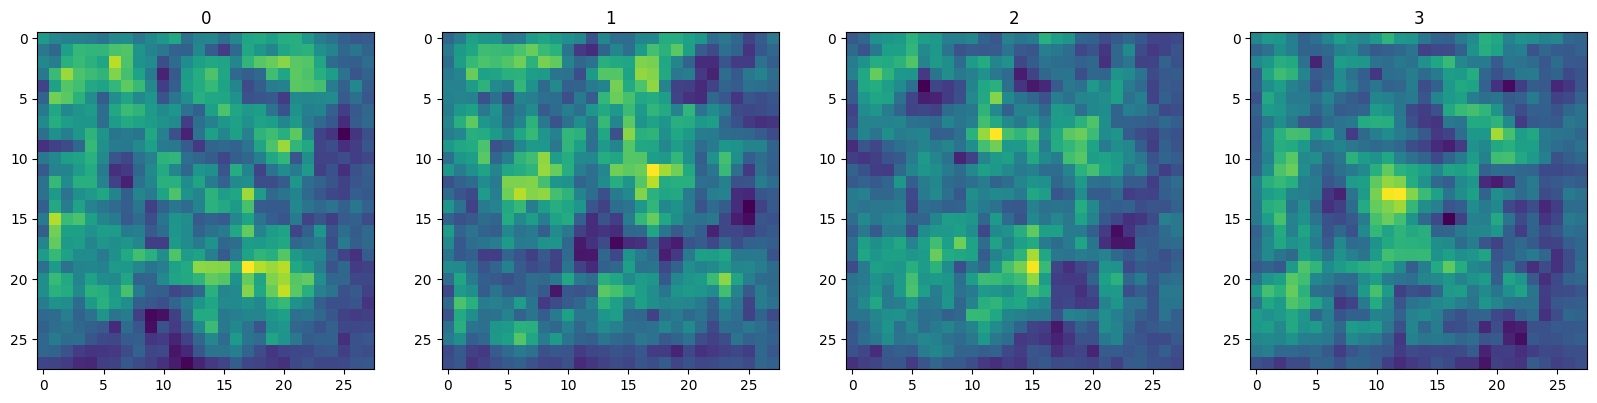

In [25]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(img):
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

In [33]:
def build_discriminator():
  model = Sequential()

  model.add(Conv2D(32,5,input_shape = (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))


  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))


  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  return model

In [34]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_9 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 128)      

In [38]:
img.shape

(4, 28, 28, 1)

In [40]:
discriminator.predict(img)

1/1 [==============================] - 0s 70ms/step


array([[0.4853257 ],
       [0.48551917],
       [0.4854583 ],
       [0.48520958]], dtype=float32)

In [41]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [42]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [44]:
from tensorflow.keras.models import Model

In [46]:
tf.random.normal((6,128,1))

<tf.Tensor: shape=(6, 128, 1), dtype=float32, numpy=
array([[[ 9.46716592e-02],
        [-1.04886377e+00],
        [ 1.07959533e+00],
        [ 1.65147078e+00],
        [-1.67339349e+00],
        [ 1.31928623e-01],
        [-8.52449894e-01],
        [ 3.82613093e-01],
        [ 1.52655387e+00],
        [-1.65052438e+00],
        [-3.11249077e-01],
        [ 5.84697008e-01],
        [-1.72204030e+00],
        [ 5.38205504e-01],
        [-1.11577176e-01],
        [ 1.11555517e+00],
        [-1.40257227e+00],
        [ 5.57675004e-01],
        [ 1.21829820e+00],
        [-5.88669538e-01],
        [-4.88767326e-02],
        [-6.58083975e-01],
        [-1.68314922e+00],
        [ 1.04191065e+00],
        [-8.59748363e-01],
        [ 1.39985517e-01],
        [-1.44818604e-01],
        [ 2.22469404e-01],
        [-1.61219999e-01],
        [-1.31263959e+00],
        [-5.22035003e-01],
        [ 4.73364174e-01],
        [-4.99161333e-01],
        [-1.50613344e+00],
        [-2.99007267e-01],
  

In [73]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        super().compile(*args, **kwargs)

        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        with tf.GradientTape() as d_tape:


            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        with tf.GradientTape() as g_tape:
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            predicted_labels = self.discriminator(gen_images, training=False)

            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [74]:
fashgan = FashionGAN(generator,discriminator)

In [75]:
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

In [76]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [77]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [78]:
hist = fashgan.fit(ds,epochs=20,callbacks=[ModelMonitor()])

Epoch 1/20
  6/469 [..............................] - ETA: 1:17 - d_loss: 0.7001 - g_loss: 0.6615

469/469 [==============================] - 83s 174ms/step - d_loss: 0.5352 - g_loss: 0.7911
Epoch 2/20
469/469 [==============================] - 79s 168ms/step - d_loss: 0.3352 - g_loss: 2.1486
Epoch 3/20
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2762 - g_loss: 2.6435
Epoch 4/20
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2738 - g_loss: 2.7014
Epoch 5/20
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2726 - g_loss: 2.7571
Epoch 6/20
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2710 - g_loss: 2.7759
Epoch 7/20
469/469 [==============================] - 78s 166ms/step - d_loss: 0.2692 - g_loss: 2.7844
Epoch 8/20
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2692 - g_loss: 2.7864
Epoch 9/20
469/469 [==============================] - 78s 167ms/step - d_loss: 0.2678 - g_loss: 2.8037
Epoch 10/20
469/469 [==============================] - 78s 166ms/step - d_loss: 0.30

1/1 [==============================] - 1s 631ms/step


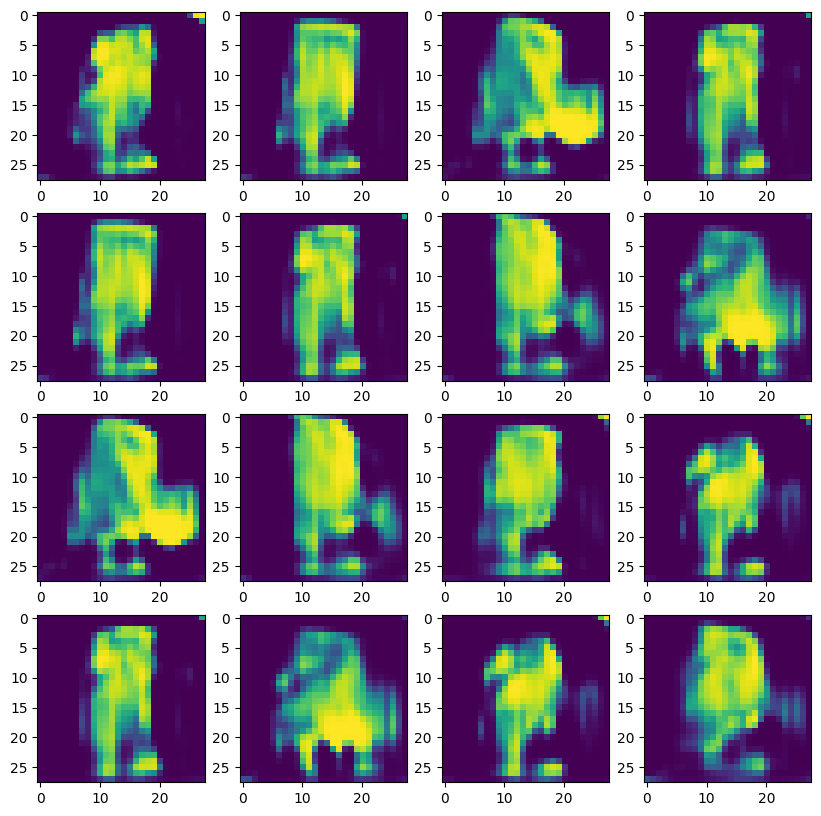

In [82]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [81]:
generator.load_weights(os.path.join('archive', 'generatormodel.h5'))


FileNotFoundError: ignored